# Analysis of Kotak Educational Data

For this analysis, I will focus on, total avarage resource time, percentage of marks obtained by students in pre-test, midline and post-test.
To get a overall idea, I will follow the top down method of analysis.



In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os.chdir('/home/deepak/Documents/kotak_learning_analysis')

In [3]:
pwd

'/home/deepak/Documents/kotak_learning_analysis'

# Data for the analysis

In [4]:
data =  pd.read_excel('ko.xlsx',1, skiprows=1)

In [5]:
data

,School,Medium,Student name,Pre-test Eng (Set 1 and 2),Midline 1 Eng (Set 1 and 2),Midline 2 Eng (Set 1 and 2),Post-test Eng (Set 1 and 2),Pre-test Math (Set 1 and 2),Midline 1 Math (Set 1 and 2),Midline 2 Math (Set 1 and 2),...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
0,A,Semi-marathi,1,15.5,20.0,8,10.0,12.1,0.0,10,...,0.92,0.98,0.896667,0.8,0.9,0.96,0.99,0.99,0.99,0.938333
1,B,Semi-Hindi,2,0.0,0.0,0,0.0,0.0,0.0,0,...,Ab,Ab,NaN,Ab,Ab,Ab,Ab,Ab,Ab,NaN
2,C,Marathi,3,2.0,3.6,8,8.5,12.0,2.8,15,...,0.39,0.76,0.680000,0.7,0.8,0.76,0.82,0.9,0.87,0.808333
3,D,Hindi,4,0.0,0.0,0,0.0,0.0,3.0,5,...,0.6,0.39,0.426667,0.2,0.3,0.4,0.42,0.47,0.5,0.381667
4,E,Semi-marathi,5,2.0,4.0,5,1.0,2.0,7.0,3,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.3,0.57,0.23,0.463333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,Semi-marathi,96,10.0,9.0,2,20.0,11.0,17.0,8,...,0.68,0.47,0.536667,0.36,0.8,0.48,0.67,0.35,0.6,0.543333
96,G,Semi-marathi,97,9.0,12.0,7,4.0,14.0,7.0,9,...,0.68,0.56,0.633333,0.47,0.61,0.28,0.56,0.25,0.7,0.478333
97,H,Marathi,98,19.0,17.0,6,5.0,20.0,9.0,14,...,0.47,0.67,0.636667,0.59,0.34,0.7,0.47,0.29,0.6,0.498333
98,I,Semi-Hindi,99,0.0,0.0,0,0.0,0.0,0.0,0,...,0.59,0.56,0.570000,0.2,0.57,0.55,0.69,0.76,0.58,0.558333


Identifying the types of data and hencefoth we will choose the appropriate method.
Note: Percentage marks of the students are shown as 'object' data types it must be converted to 'float' data types for the analysis.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
School                           100 non-null object
Medium                           100 non-null object
Student name                     100 non-null int64
Pre-test Eng (Set 1 and 2)       100 non-null float64
Midline 1 Eng (Set 1 and 2)      100 non-null float64
Midline 2 Eng (Set 1 and 2)      100 non-null int64
Post-test Eng (Set 1 and 2)      100 non-null float64
Pre-test Math (Set 1 and 2)      100 non-null float64
Midline 1 Math (Set 1 and 2)     98 non-null float64
Midline 2 Math (Set 1 and 2)     100 non-null int64
Post-test Math (Set 1 and 2)     100 non-null int64
Pre-test Sci (Set 1 and 2)       99 non-null float64
Midline 1 Sci (Set 1 and 2)      99 non-null float64
Midline 2 Sci (Set 1 and 2)      99 non-null float64
Post-test Sci (Set 1 and 2)      99 non-null float64
All subjects across all tests    100 non-null float64
Eng  (set 1)                     100 non-null o

In [7]:
data.columns

Index(['School', 'Medium', 'Student name', 'Pre-test Eng (Set 1 and 2)',
       'Midline 1 Eng (Set 1 and 2)', 'Midline 2 Eng (Set 1 and 2)',
       'Post-test Eng (Set 1 and 2)', 'Pre-test Math (Set 1 and 2)',
       'Midline 1 Math (Set 1 and 2)', 'Midline 2 Math (Set 1 and 2)',
       'Post-test Math (Set 1 and 2)', 'Pre-test Sci (Set 1 and 2)',
       'Midline 1 Sci (Set 1 and 2)', 'Midline 2 Sci (Set 1 and 2)',
       'Post-test Sci (Set 1 and 2)', 'All subjects across all tests',
       'Eng  (set 1)', 'Eng  (set 2)', 'Math (set 1)', 'Math (set 2)',
       'Sci (set 1)', 'Sci (set 2)', 'Avg', 'Eng  (set 1).1', 'Math (set 1).1',
       'Sci (set 1).1', 'Avg.1', 'Eng  (set 2).1', 'Math (set 2).1',
       'Sci (set 2).1', 'Avg.2', 'Eng  (set 1).2', 'Eng  (set 2).2',
       'Math (set 1).2', 'Math (set 2).2', 'Sci (set 1).2', 'Sci (set 2).2',
       'Avg.3'],
      dtype='object')

In [8]:
data.set_index("Medium", inplace = True)


In [69]:
data.head()

,School,Student name,Pre-test Eng (Set 1 and 2),Midline 1 Eng (Set 1 and 2),Midline 2 Eng (Set 1 and 2),Post-test Eng (Set 1 and 2),Pre-test Math (Set 1 and 2),Midline 1 Math (Set 1 and 2),Midline 2 Math (Set 1 and 2),Post-test Math (Set 1 and 2),...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
Medium,,,,,,,,,,,,,,,,,,,,,
Semi-marathi,A,1,15.5,20.0,8,10.0,12.1,0.0,10,6,...,0.92,0.98,0.896667,0.8,0.9,0.96,0.99,0.99,0.99,0.938333
Semi-Hindi,B,2,0.0,0.0,0,0.0,0.0,0.0,0,0,...,Ab,Ab,NaN,Ab,Ab,Ab,Ab,Ab,Ab,NaN
Marathi,C,3,2.0,3.6,8,8.5,12.0,2.8,15,0,...,0.39,0.76,0.680000,0.7,0.8,0.76,0.82,0.9,0.87,0.808333
Hindi,D,4,0.0,0.0,0,0.0,0.0,3.0,5,9,...,0.6,0.39,0.426667,0.2,0.3,0.4,0.42,0.47,0.5,0.381667
Semi-marathi,E,5,2.0,4.0,5,1.0,2.0,7.0,3,4,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.3,0.57,0.23,0.463333


# At the top level we would like to know that how the amount of time spent with resource affecting students performance.


our hypothesis is: 
The amount of time spent by students has no affect on students performance.

In [10]:
TotalAverageResourceTime_AvgPostTestPerformance = data[['All subjects across all tests','Avg.3']]

Fist we analyze the overall data, and try to find out , are there any relation exist between time spent on resources and performance in post test.
We have choosen 'postdata for our analysis' . 

In [11]:
TotalAverageResourceTime_AvgPostTestPerformance 

,All subjects across all tests,Avg.3
Medium,,
Semi-marathi,81.6,0.938333
Semi-Hindi,0.0,NaN
Marathi,94.9,0.808333
Hindi,34.0,0.381667
Semi-marathi,31.0,0.463333
...,...,...
Semi-marathi,85.0,0.543333
Semi-marathi,80.0,0.478333
Marathi,107.0,0.498333


In [12]:
TotalAverageResourceTime_AvgPostTestPerformance_removeNA = TotalAverageResourceTime_AvgPostTestPerformance.dropna(axis=0, inplace=False)

In [13]:
TotalAverageResourceTime_AvgPostTestPerformance_removeNA

,All subjects across all tests,Avg.3
Medium,,
Semi-marathi,81.6,0.938333
Marathi,94.9,0.808333
Hindi,34.0,0.381667
Semi-marathi,31.0,0.463333
Semi-marathi,16.0,0.481667
...,...,...
Semi-marathi,85.0,0.543333
Semi-marathi,80.0,0.478333
Marathi,107.0,0.498333


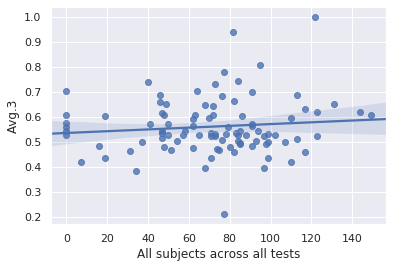

In [16]:
sns.set(style = 'darkgrid')
sns.regplot(x = TotalAverageResourceTime_AvgPostTestPerformance_removeNA['All subjects across all tests'],
           y = TotalAverageResourceTime_AvgPostTestPerformance_removeNA['Avg.3'])

## below analysis clearly show that spending much time with the resource does not related to high performace in the post test.

In [17]:
TotalAverageResourceTime_AvgPostTestPerformance_removeNA.corr()

,All subjects across all tests,Avg.3
All subjects across all tests,1.000000,0.105076
Avg.3,0.105076,1.000000


*The similar analysis can be done pre-test, midline1, midline2 and corresponding time spent. 

# Now we analyze the same problem at lower level. We will try to find out relationship between time spent and performance wrt differnt types of school.

# Semi- Marathi

In [21]:
semi_marathi = TotalAverageResourceTime_AvgPostTestPerformance_removeNA.loc['Semi-marathi']
semi_marathi.head()


,All subjects across all tests,Avg.3
Medium,,
Semi-marathi,81.6,0.938333
Semi-marathi,31.0,0.463333
Semi-marathi,16.0,0.481667
Semi-marathi,7.0,0.418333
Semi-marathi,50.0,0.570000


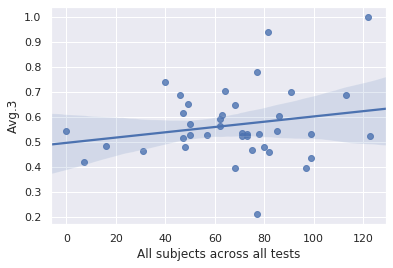

In [19]:
sns.set(style = 'darkgrid')
sns.regplot(x = semi_marathi['All subjects across all tests'],
           y = semi_marathi['Avg.3'])

From the below analysis, it is clear that, there is no relationship between time spend and performance.

In [20]:
semi_marathi.corr()

,All subjects across all tests,Avg.3
All subjects across all tests,1.000000,0.203101
Avg.3,0.203101,1.000000


# Semi-Hindi

In [23]:
semi_hindi = TotalAverageResourceTime_AvgPostTestPerformance_removeNA.loc['Semi-Hindi']
semi_hindi.head()

,All subjects across all tests,Avg.3
Medium,,
Semi-Hindi,41.0,0.571667
Semi-Hindi,88.0,0.526667
Semi-Hindi,110.0,0.596667
Semi-Hindi,0.0,0.526667
Semi-Hindi,82.0,0.661667


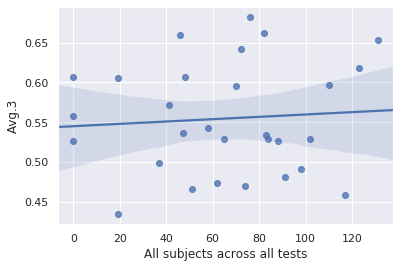

In [25]:
sns.set(style = 'darkgrid')
sns.regplot(x = semi_hindi['All subjects across all tests'],
           y = semi_hindi['Avg.3'])

# No relationship

In [24]:
semi_hindi.corr()

,All subjects across all tests,Avg.3
All subjects across all tests,1.000000,0.077254
Avg.3,0.077254,1.000000


# Marathi

In [26]:
marathi = TotalAverageResourceTime_AvgPostTestPerformance_removeNA.loc['Marathi']
marathi


,All subjects across all tests,Avg.3
Medium,,
Marathi,94.9,0.808333
Marathi,149.0,0.608333
Marathi,97.0,0.525000
Marathi,0.0,0.573333
Marathi,85.0,0.491667
Marathi,113.0,0.510000
Marathi,73.0,0.731667
Marathi,76.0,0.508333
Marathi,91.0,0.565000


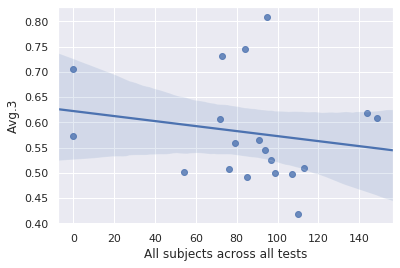

In [27]:
sns.set(style = 'darkgrid')
sns.regplot(x = marathi['All subjects across all tests'],
           y = marathi['Avg.3'])

# its interesting, we have a negative relationship, performance and time spent on resources. We have to check the types of resources provoded to marathi students.

In [28]:
marathi.corr()

,All subjects across all tests,Avg.3
All subjects across all tests,1.00000,-0.18349
Avg.3,-0.18349,1.00000


# Hindi

In [30]:
hindi = TotalAverageResourceTime_AvgPostTestPerformance_removeNA.loc['Hindi']
hindi.head()

,All subjects across all tests,Avg.3
Medium,,
Hindi,34.0,0.381667
Hindi,84.0,0.503333
Hindi,117.0,0.631667
Hindi,91.0,0.571667
Hindi,85.0,0.493333


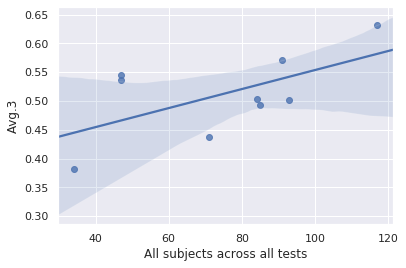

In [31]:
sns.set(style = 'darkgrid')
sns.regplot(x = hindi['All subjects across all tests'],
           y = hindi['Avg.3'])

# It's also interesting observation. the students performace is influenced by time spent by studnets with resources. 
# We have look this data in more details.

In [32]:
hindi.corr()

,All subjects across all tests,Avg.3
All subjects across all tests,1.000000,0.607756
Avg.3,0.607756,1.000000


# Analyzing percentage of marks data for Pre-test, Midline1, Midline2, Post-test

In [33]:
data_marks_per = data[['Eng  (set 1)', 'Eng  (set 2)', 'Math (set 1)', 'Math (set 2)',
                                  'Sci (set 1)', 'Sci (set 2)', 'Avg', 'Eng  (set 1).1', 'Math (set 1).1',
                                  'Sci (set 1).1', 'Avg.1', 'Eng  (set 2).1', 'Math (set 2).1',
                                  'Sci (set 2).1', 'Avg.2', 'Eng  (set 1).2', 'Eng  (set 2).2',
                                  'Math (set 1).2', 'Math (set 2).2', 'Sci (set 1).2', 'Sci (set 2).2',
                                  'Avg.3']]
data_marks_per

,Eng (set 1),Eng (set 2),Math (set 1),Math (set 2),Sci (set 1),Sci (set 2),Avg,Eng (set 1).1,Math (set 1).1,Sci (set 1).1,...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
Medium,,,,,,,,,,,,,,,,,,,,,
Semi-marathi,0.37,0.72,0.8,0.98,0.72,0.86,0.741667,0.77,0.88,0.9,...,0.92,0.98,0.896667,0.8,0.9,0.96,0.99,0.99,0.99,0.938333
Semi-Hindi,Ab,Ab,Ab,Ab,Ab,Ab,NaN,Ab,Ab,Ab,...,Ab,Ab,NaN,Ab,Ab,Ab,Ab,Ab,Ab,NaN
Marathi,0.7,0.64,0.5,0.6,0.42,0.51,0.561667,0.79,0.77,0.7,...,0.39,0.76,0.680000,0.7,0.8,0.76,0.82,0.9,0.87,0.808333
Hindi,0.2,0.25,0.26,0.07,0.18,0.3,0.210000,0.2,0.27,0.42,...,0.6,0.39,0.426667,0.2,0.3,0.4,0.42,0.47,0.5,0.381667
Semi-marathi,0.3,0.22,0.4,0.45,0.67,0.56,0.433333,0.44,0.37,0.7,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.3,0.57,0.23,0.463333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Semi-marathi,0.34,0.57,0.44,0.46,0.6,0.35,0.460000,0.56,0.55,0.37,...,0.68,0.47,0.536667,0.36,0.8,0.48,0.67,0.35,0.6,0.543333
Semi-marathi,0.57,0.68,0.55,0.36,0.92,0.36,0.573333,0.67,0.36,0.57,...,0.68,0.56,0.633333,0.47,0.61,0.28,0.56,0.25,0.7,0.478333
Marathi,0.35,0.78,0.67,0.47,0.4,0.49,0.526667,0.46,0.6,0.68,...,0.47,0.67,0.636667,0.59,0.34,0.7,0.47,0.29,0.6,0.498333


In [36]:
data_marks_per = data_marks_per.replace('Ab', np.nan)
data_marks_per.head()

,Eng (set 1),Eng (set 2),Math (set 1),Math (set 2),Sci (set 1),Sci (set 2),Avg,Eng (set 1).1,Math (set 1).1,Sci (set 1).1,...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
Medium,,,,,,,,,,,,,,,,,,,,,
Semi-marathi,0.37,0.72,0.80,0.98,0.72,0.86,0.741667,0.77,0.88,0.90,...,0.92,0.98,0.896667,0.80,0.90,0.96,0.99,0.99,0.99,0.938333
Semi-Hindi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marathi,0.70,0.64,0.50,0.60,0.42,0.51,0.561667,0.79,0.77,0.70,...,0.39,0.76,0.680000,0.70,0.80,0.76,0.82,0.90,0.87,0.808333
Hindi,0.20,0.25,0.26,0.07,0.18,0.30,0.210000,0.20,0.27,0.42,...,0.6,0.39,0.426667,0.20,0.30,0.40,0.42,0.47,0.50,0.381667
Semi-marathi,0.30,0.22,0.40,0.45,0.67,0.56,0.433333,0.44,0.37,0.70,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.30,0.57,0.23,0.463333


In [39]:
data_marks_per_removeNA = data_marks_per.dropna(axis = 0, inplace= False)
data_marks_per_removeNA



,Eng (set 1),Eng (set 2),Math (set 1),Math (set 2),Sci (set 1),Sci (set 2),Avg,Eng (set 1).1,Math (set 1).1,Sci (set 1).1,...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
Medium,,,,,,,,,,,,,,,,,,,,,
Semi-marathi,0.37,0.72,0.80,0.98,0.72,0.86,0.741667,0.77,0.88,0.90,...,0.92,0.98,0.896667,0.80,0.90,0.96,0.99,0.99,0.99,0.938333
Marathi,0.70,0.64,0.50,0.60,0.42,0.51,0.561667,0.79,0.77,0.70,...,0.39,0.76,0.680000,0.70,0.80,0.76,0.82,0.90,0.87,0.808333
Hindi,0.20,0.25,0.26,0.07,0.18,0.30,0.210000,0.20,0.27,0.42,...,0.6,0.39,0.426667,0.20,0.30,0.40,0.42,0.47,0.50,0.381667
Semi-marathi,0.30,0.22,0.40,0.45,0.67,0.56,0.433333,0.44,0.37,0.70,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.30,0.57,0.23,0.463333
Semi-marathi,0.40,0.56,0.45,0.37,0.67,0.56,0.501667,0.22,0.90,0.67,...,0.45,0.45,0.600000,0.56,0.35,0.57,0.40,0.56,0.45,0.481667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Semi-marathi,0.34,0.57,0.44,0.46,0.60,0.35,0.460000,0.56,0.55,0.37,...,0.68,0.47,0.536667,0.36,0.80,0.48,0.67,0.35,0.60,0.543333
Semi-marathi,0.57,0.68,0.55,0.36,0.92,0.36,0.573333,0.67,0.36,0.57,...,0.68,0.56,0.633333,0.47,0.61,0.28,0.56,0.25,0.70,0.478333
Marathi,0.35,0.78,0.67,0.47,0.40,0.49,0.526667,0.46,0.60,0.68,...,0.47,0.67,0.636667,0.59,0.34,0.70,0.47,0.29,0.60,0.498333


In [40]:
data_marks_per_removeNA.columns

Index(['Eng  (set 1)', 'Eng  (set 2)', 'Math (set 1)', 'Math (set 2)',
       'Sci (set 1)', 'Sci (set 2)', 'Avg', 'Eng  (set 1).1', 'Math (set 1).1',
       'Sci (set 1).1', 'Avg.1', 'Eng  (set 2).1', 'Math (set 2).1',
       'Sci (set 2).1', 'Avg.2', 'Eng  (set 1).2', 'Eng  (set 2).2',
       'Math (set 1).2', 'Math (set 2).2', 'Sci (set 1).2', 'Sci (set 2).2',
       'Avg.3'],
      dtype='object')

In [47]:
data_marks_per_removeNA = data_marks_per_removeNA.astype({'Avg': 'float', 'Avg.1': 'float', 'Avg.2': 'float', 'Avg.3':'float'})
data_marks_per_removeNA.head()

,Eng (set 1),Eng (set 2),Math (set 1),Math (set 2),Sci (set 1),Sci (set 2),Avg,Eng (set 1).1,Math (set 1).1,Sci (set 1).1,...,Math (set 2).1,Sci (set 2).1,Avg.2,Eng (set 1).2,Eng (set 2).2,Math (set 1).2,Math (set 2).2,Sci (set 1).2,Sci (set 2).2,Avg.3
Medium,,,,,,,,,,,,,,,,,,,,,
Semi-marathi,0.37,0.72,0.80,0.98,0.72,0.86,0.741667,0.77,0.88,0.90,...,0.92,0.98,0.896667,0.80,0.90,0.96,0.99,0.99,0.99,0.938333
Marathi,0.70,0.64,0.50,0.60,0.42,0.51,0.561667,0.79,0.77,0.70,...,0.39,0.76,0.680000,0.70,0.80,0.76,0.82,0.90,0.87,0.808333
Hindi,0.20,0.25,0.26,0.07,0.18,0.30,0.210000,0.20,0.27,0.42,...,0.6,0.39,0.426667,0.20,0.30,0.40,0.42,0.47,0.50,0.381667
Semi-marathi,0.30,0.22,0.40,0.45,0.67,0.56,0.433333,0.44,0.37,0.70,...,0.4,0.56,0.453333,0.45,0.45,0.78,0.30,0.57,0.23,0.463333
Semi-marathi,0.40,0.56,0.45,0.37,0.67,0.56,0.501667,0.22,0.90,0.67,...,0.45,0.45,0.600000,0.56,0.35,0.57,0.40,0.56,0.45,0.481667


# To see that are there any difference exist between performance of the students in pre-test, midlines test, post-test . We used the ANOVA anaysis.

In [49]:
data_marks_per_removeNA_melt = pd.melt(data_marks_per_removeNA.reset_index(), value_vars=['Avg', 'Avg.1', 'Avg.2', 'Avg.3'])
data_marks_per_removeNA_melt


,variable,value
0,Avg,0.741667
1,Avg,0.561667
2,Avg,0.210000
3,Avg,0.433333
4,Avg,0.501667
...,...,...
355,Avg.3,0.543333
356,Avg.3,0.478333
357,Avg.3,0.498333
358,Avg.3,0.558333


In [51]:
data_marks_per_removeNA_melt.columns = ['treatments', 'value']
data_marks_per_removeNA_melt

,treatments,value
0,Avg,0.741667
1,Avg,0.561667
2,Avg,0.210000
3,Avg,0.433333
4,Avg,0.501667
...,...,...
355,Avg.3,0.543333
356,Avg.3,0.478333
357,Avg.3,0.498333
358,Avg.3,0.558333


In [52]:
import matplotlib.pyplot as plt


From the box plot we can see visually that there is no significant difference between mean and standard deviation of all these four groups. 

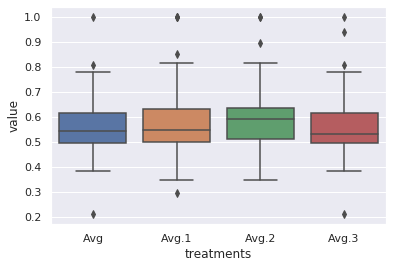

In [53]:
ax = sns.boxplot(x='treatments', y='value', data=data_marks_per_removeNA_melt)


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Since p > 0.05 , here there is difference in performance among pre-test, midline1, Midline2 and post test.

In [68]:
model = ols('value ~ C(treatments)', data=data_marks_per_removeNA_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 


,sum_sq,df,F,PR(>F)
C(treatments),0.039668,3.0,0.971299,0.40633
Residual,4.846334,356.0,NaN,NaN



# Conclusion: We can conclude that intervention improve the performance of students. 
## We can futher use post-hoc test to analyze the results in more details.

# Statistica methd :  ANOVA, boxplot, scatterplot, correlation matrix

# Problem faced: 
I was not sure about the intervention. Mainly how and the pre-test are done that is,  the pretest done before providing the resources or not. 
I am also not sure about set1 and set2 and its signifiace.

IF the research study will be expalined in much retailed, it would helped me in analyzing the data in more detail. 

# Tools used:  Jupyter notebook, python